In [1]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('/Users/averyanderson/Desktop/data/ufo_clean_data.csv',low_memory=False) #read in data

In [3]:
df.head()

,datetime,city,country,shape,duration (seconds),date posted,latitude,longitude,month,year,month_num
0,1949-10-10 20:30:00,san marcos,US,cylinder,2700.0,2004-04-27,29.883056,-97.941111,1949-10,1949,10
1,1955-10-10 17:00:00,chester (uk/england),GB,circle,20.0,2008-01-21,53.200000,-2.916667,1955-10,1955,10
2,1956-10-10 21:00:00,edna,US,circle,20.0,2004-01-17,28.978333,-96.645833,1956-10,1956,10
3,1960-10-10 20:00:00,kaneohe,US,light,900.0,2004-01-22,21.418056,-157.803611,1960-10,1960,10
4,1961-10-10 19:00:00,bristol,US,sphere,300.0,2007-04-27,36.595000,-82.188889,1961-10,1961,10


In [7]:
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables
print(df.columns, '\n') # Column names

(69001, 11) 

datetime               object
city                   object
country                object
shape                  object
duration (seconds)    float64
date posted            object
latitude              float64
longitude             float64
month                  object
year                    int64
month_num               int64
dtype: object 

Index(['datetime', 'city', 'country', 'shape', 'duration (seconds)',
       'date posted', 'latitude', 'longitude ', 'month', 'year', 'month_num'],
      dtype='object') 



In [11]:
df1 = df[['duration (seconds)', 'country']]
df_encode = pd.get_dummies(df1, columns=['country'], drop_first=True)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_encode, test_size=0.2, random_state=42)

In [13]:
y = df['duration (seconds)'] #using a categorical variable (2nd model)
X_d = pd.get_dummies(df['country'],dtype='int') # Create brand dummies
from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression(fit_intercept=False).fit(X_d, y) 
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) 
print('R-squared: ', reg.score(X_d, y)) 
results

R-squared:  0.00030230331190872484


,variable,coefficient
0,AU,3833.293074
1,CA,29048.375980
2,DE,24342.504854
3,GB,67668.851159
4,US,5526.777826


In [15]:
y = df['duration (seconds)'] #using a categorical variable 
X_d = pd.get_dummies(df['shape'],dtype='int') # Create dummies
from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression(fit_intercept=False).fit(X_d, y) 
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) 
print('R-squared: ', reg.score(X_d, y)) 
results

R-squared:  0.00020826207756097226


,variable,coefficient
0,changed,3600.000000
1,changing,2109.034678
2,chevron,468.111182
3,cigar,2094.527855
4,circle,3512.199762
5,cone,94630.771739
6,crescent,37800.000000
7,cross,745.139423
8,cylinder,3821.043672
9,delta,2307.857143


In [24]:
y = df['duration (seconds)'] 
X_d = pd.get_dummies(df['month'],dtype='int') 
reg = LinearRegression(fit_intercept=False).fit(X_d, y) 
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) 
print('R-squared: ', reg.score(X_d, y)) 
results

R-squared:  0.06020180363805061


,variable,coefficient
0,1910-01,120.000000
1,1910-06,120.000000
2,1920-06,60.000000
3,1925-12,60.000000
4,1929-07,60.000000
...,...,...
776,2014-01,591.298770
777,2014-02,1019.543981
778,2014-03,887.663804
779,2014-04,726.889558


In [54]:
X = df[['month_num']]
y = df['duration (seconds)']
reg = LinearRegression().fit(X, y) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X, y)) # R squared measure

4237.489459675191
[580.72409616]
8.814943807666786e-06


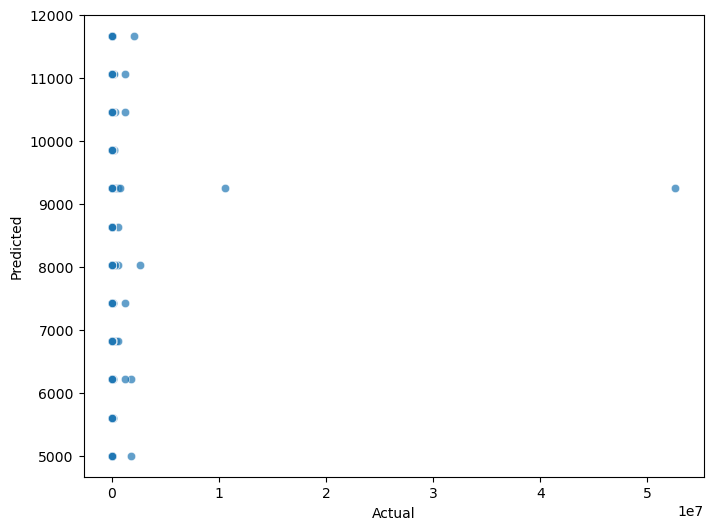

In [58]:
X = df[['month_num']]
y = df['duration (seconds)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [36]:
top_number = df['date posted'].value_counts().head(15) #dates where most sightings were recorded
print(top_number)

date posted
2009-12-12    1324
2006-10-30    1196
2010-11-21    1111
2008-10-31    1028
2013-08-30     947
2009-03-19     935
2009-01-10     931
2001-08-05     911
2008-06-12     858
2012-08-05     850
2012-09-24     826
2011-10-10     821
2013-05-15     787
2009-08-05     787
2011-12-12     765
Name: count, dtype: int64


In [38]:
top_number_df = df['date posted'].value_counts().head(50).reset_index()
top_number_df.columns = ['date posted', 'count']
print(top_number_df)

   date posted  count
0   2009-12-12   1324
1   2006-10-30   1196
2   2010-11-21   1111
3   2008-10-31   1028
4   2013-08-30    947
5   2009-03-19    935
6   2009-01-10    931
7   2001-08-05    911
8   2008-06-12    858
9   2012-08-05    850
10  2012-09-24    826
11  2011-10-10    821
12  2013-05-15    787
13  2009-08-05    787
14  2011-12-12    765
15  1999-01-28    737
16  2007-02-01    729
17  2000-12-02    725
18  2006-05-15    716
19  2007-08-07    706
20  2007-10-08    701
21  2012-10-30    697
22  2007-11-28    656
23  2012-05-13    649
24  2005-10-11    630
25  2008-08-12    621
26  2008-03-04    599
27  2013-07-03    593
28  2013-02-04    592
29  2007-04-27    581
30  2012-12-20    565
31  2006-07-16    533
32  2014-01-10    522
33  2012-07-04    520
34  2005-09-02    517
35  2013-09-30    492
36  2010-02-14    487
37  2006-02-14    476
38  2006-12-07    471
39  2012-01-12    468
40  2001-02-18    457
41  2010-04-13    449
42  2005-12-16    449
43  2013-11-11    449
44  2005-0

In [40]:
top_number_df.head()

,date posted,count
0,2009-12-12,1324
1,2006-10-30,1196
2,2010-11-21,1111
3,2008-10-31,1028
4,2013-08-30,947


In [44]:
top_number_df['date posted'] = pd.to_datetime(top_number_df['date posted'])
# Convert dates to ordinal (numeric) values
top_number_df['date_ordinal'] = top_number_df['date posted'].map(pd.Timestamp.toordinal)

In [52]:
X = top_number_df[['date_ordinal']]
y = top_number_df['count']
reg = LinearRegression().fit(X, y) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X, y)) # R squared measure

-6542.270292293161
[0.00983011]
0.00389756241822381
